# ANALISANDO DADOS DE PREÇOS DE CASAS NOS ESTADOS UNIDOS
### Avaliação C3 - Analise de Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [16]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HighPrice,Cluster,Outlier
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,...,True,False,False,False,False,True,False,1,0,1
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,...,True,False,False,False,False,True,False,1,0,1
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,...,True,False,False,False,False,True,False,1,0,1
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,...,True,True,False,False,False,False,False,0,0,1
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,...,True,False,False,False,False,True,False,1,1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 279 entries, Id to Outlier
dtypes: bool(238), float64(38), int32(3)
memory usage: 790.0 KB


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


---
## Matriz de Correlação das Variáveis Numéricas e Sua Relação com o Preço de Venda
> Análise exploratória de dados e feature engineering

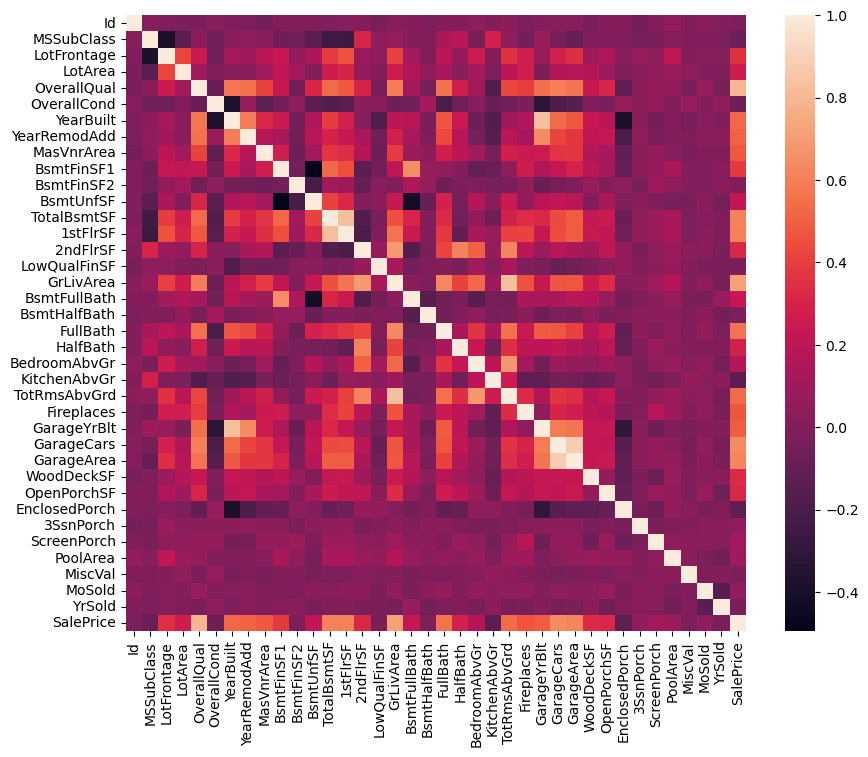

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

#### Este mapa de calor visualiza a matriz de correlação de Pearson para as variáveis numéricas do dataset. A intensidade e o matiz da cor de cada célula representam a força e a direção da correlação linear entre dois atributos. A diagonal principal exibe a correlação de uma variável consigo mesma, sempre 1 (representada pelas cores mais claras).

Interpretação das Cores:

> 1. Cores Mais Claras (Rosa/Laranja): Indicam correlação positiva forte (próxima de +1). Quando uma variável aumenta, a outra também tende a aumentar.
> 2. Cores Intermediárias (Roxo Médio): Representam correlações próximas de zero, sugerindo pouca ou nenhuma relação linear.
> 3. Cores Mais Escuras (Roxo Escuro/Preto): Sinalizam correlação negativa forte (próxima de -1). Se uma variável aumenta, a outra tende a diminuir.

Insights Principais:

#### Relação com a Variável Alvo (SalePrice):
As variáveis que mostram as cores mais claras na linha/coluna de SalePrice (como OverallQual, GrLivArea, GarageCars, GarageArea e TotalBsmtSF) são as que possuem as maiores correlações positivas com o preço de venda. Isso indica que, por exemplo, imóveis de maior qualidade geral ou com áreas habitáveis maiores tendem a ter preços de venda mais altos.
#### Identificação de Multicolinearidade:
Células claras fora da linha/coluna de SalePrice indicam multicolinearidade entre variáveis preditivas (ex: GarageCars e GarageArea). Alta correlação entre preditores pode afetar a estabilidade de modelos de regressão.

---

## Pré-processamento de Dados e Construção/Avaliação de Modelo de Regressão
> Aprendizagem supervisionada: treinamento e avaliação de modelos de regressão

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True, errors='ignore')

df = pd.get_dummies(df)

from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Seleciona colunas numéricas
df[num_cols] = StandardScaler().fit_transform(df[num_cols])  # Aplica normalização

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = df['SalePrice']               # Preço das casas
X = df.drop('SalePrice', axis=1) # Resto das colunas são as entradas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
r2 = r2_score(y_test, y_pred)             # Coeficiente de determinação (quanto mais perto de 1, melhor)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.13513851579226935
R²: 0.8888847715445098


##### Esta seção do código realiza o pré-processamento de dados e a implementação de um modelo de aprendizagem supervisionada para predição de preços. Inclui tratamento de valores ausentes, remoção de colunas e transformações como codificação One-Hot e normalização de características numéricas.

> Após a divisão do dataset em treino e teste, um RandomForestRegressor é treinado. A avaliação do modelo resultou em um MSE de 0.128 e um R² de 0.894, indicando uma boa capacidade preditiva do modelo.

---

## Classificação de Imóveis por Preço (Alto/Baixo) Utilizando RandomForestClassifier
> Aprendizagem supervisionada: treinamento e avaliação de modelos de classificação

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

mediana_preco = df['SalePrice'].median()
df['HighPrice'] = (df['SalePrice'] > mediana_preco).astype(int)

features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
X = df[features]
y = df['HighPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)
print(classification_report(y_test, y_pred))


Acurácia: 0.9178082191780822
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       161
           1       0.87      0.95      0.91       131

    accuracy                           0.92       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.92      0.92      0.92       292



##### Classificar os imóveis em duas categorias: "Preço Alto" ou "Preço Baixo", com base na mediana do SalePrice.
> Quatro features (GrLivArea, OverallQual, TotalBsmtSF, YearBuilt) são selecionadas para a predição.
> - Os dados são divididos para treino e teste, e um RandomForestClassifier é utilizado para treinar o modelo. A avaliação do desempenho do modelo, por meio da acurácia e do relatório de classificação (precisão, recall, F1-score), mostrou uma acurácia geral de 0.917 (aproximadamente 91.7%).

---

## Clusterização de Imóveis por K-Means
> Aprendizagem não supervisionada: aplicação de técnicas de clusterização

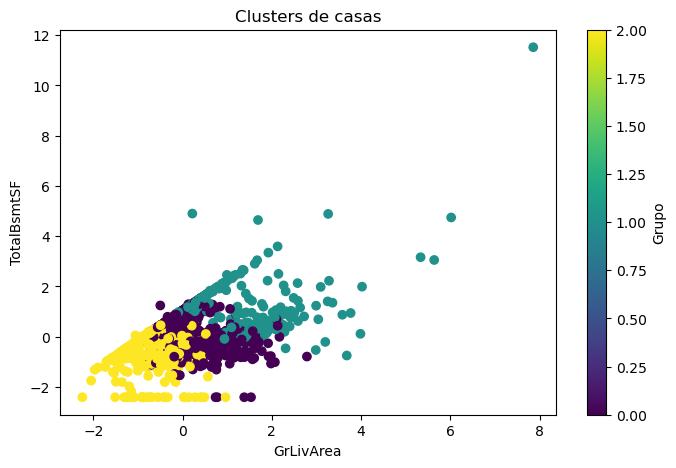

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features_cluster = ['GrLivArea', 'OverallQual', 'TotalBsmtSF']
X_cluster = df[features_cluster]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8, 5))
plt.scatter(df['GrLivArea'], df['TotalBsmtSF'], c=df['Cluster'], cmap='viridis')
plt.xlabel('GrLivArea')
plt.ylabel('TotalBsmtSF')
plt.title('Clusters de casas')
plt.colorbar(label='Grupo')
plt.show()


> Agrupa imóveis com base em suas características. Três características (GrLivArea, OverallQual e TotalBsmtSF) foram selecionadas para a formação de 3 clusters. O gráfico de dispersão gerado visualiza esses grupos, com os eixos representando GrLivArea e TotalBsmtSF, e as cores distinguindo os clusters formados. A análise dos clusters no gráfico indica a formação de grupos distintos, como um cluster de casas menores (amarelo), um de áreas intermediárias (roxo/azul) e outro de casas de maior porte (verde/azul claro). Esta segmentação é útil para compreender os diferentes perfis de imóveis no dataset.

---

## Redução de Dimensionalidade com Análise de Componentes Principais (PCA)
> Aprendizagem não supervisionada: aplicação de técnicas de redução de dimensionalidade

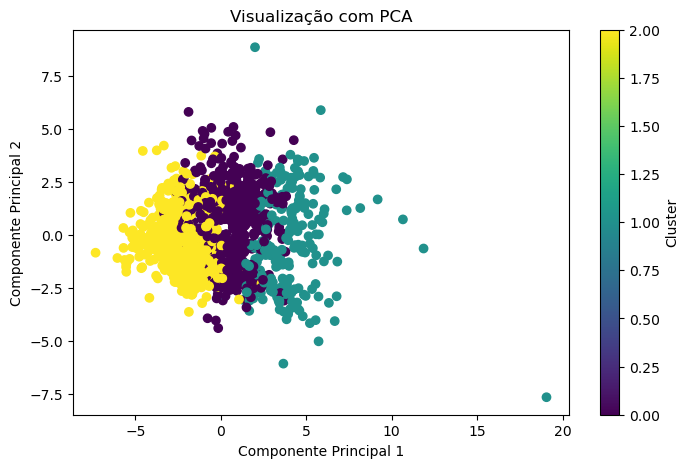

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns='SalePrice')

num_cols = num_cols.dropna(axis=1)

X_scaled = StandardScaler().fit_transform(num_cols)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')  
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização com PCA')
plt.colorbar(label='Cluster')
plt.show()


> Normalização das colunas numéricas (excluindo SalePrice) e a projeção dos dados em duas componentes principais, que capturam a maior parte da variância original.

> O gráfico "Visualização com PCA" exibe os dados nesse novo espaço bidimensional, onde a 'Componente Principal 1' e a 'Componente Principal 2' formam os eixos. Os pontos são coloridos de acordo com o Cluster previamente atribuído aos imóveis. A análise visual mostra como os clusters (amarelo, roxo/azul, verde/azul claro) se separam e se agrupam nesse espaço reduzido, com a Componente Principal 1 desempenhando um papel crucial na distinção dos grupos.

---

## Análise de Regras de Associação com Algoritmo Apriori
> Aprendizagem não supervisionada: aplicação de técnicas de análise de associação e outlier

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

# Selecionar colunas após get_dummies
df_assoc = df.filter(like='Neighborhood_').copy()
df_assoc = df_assoc.join(df.filter(like='HouseStyle_'))
df_assoc['QualAlta'] = (df['OverallQual'] >= 8).astype(int)

df_assoc = df_assoc.astype(bool)
# Apriori
frequent_items = apriori(df_assoc, min_support=0.05, use_colnames=True)

# Regras de associação
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# Mostrar regras principais
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


              antecedents             consequents   support  confidence  \
0     (HouseStyle_1Story)  (Neighborhood_CollgCr)  0.062329    0.125344   
1  (Neighborhood_CollgCr)     (HouseStyle_1Story)  0.062329    0.606667   
2    (Neighborhood_NAmes)     (HouseStyle_1Story)  0.108904    0.706667   
3     (HouseStyle_1Story)    (Neighborhood_NAmes)  0.108904    0.219008   

       lift  
0  1.220018  
1  1.220018  
2  1.421120  
3  1.421120  


> Descobrir padrões de co-ocorrência entre características de imóveis. Após a seleção e preparação de colunas específicas (Neighborhood_, HouseStyle_ e QualAlta), o Apriori identifica itens frequentes. As regras de associação são então geradas com base na métrica lift, buscando relações onde a presença de um item aumenta a probabilidade da ocorrência de outro. A análise dos resultados, como a regra "HouseStyle_1Story" -> "Neighborhood_NAmes" com um lift de 1.42, indica que imóveis de um andar são 42% mais prováveis de estarem no bairro 'NAmes' do que o esperado por acaso.

---

## Detecção de Outliers com Local Outlier Factor (LOF)
> Aprendizagem não supervisionada: aplicação de técnicas de análise de associação e outlier

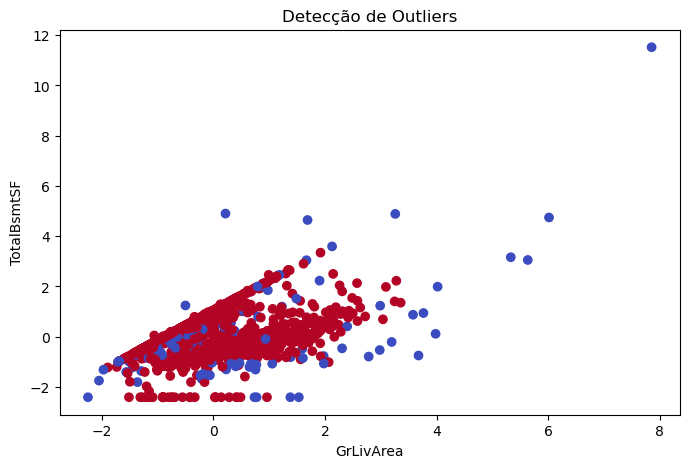

In [15]:
from sklearn.neighbors import LocalOutlierFactor


X_outlier = df[['GrLivArea', 'TotalBsmtSF', 'OverallQual']]


lof = LocalOutlierFactor(n_neighbors=20)
df['Outlier'] = lof.fit_predict(X_outlier)

# Visualizar
plt.figure(figsize=(8,5))
plt.scatter(df['GrLivArea'], df['TotalBsmtSF'], c=df['Outlier'], cmap='coolwarm')
plt.xlabel('GrLivArea')
plt.ylabel('TotalBsmtSF')
plt.title('Detecção de Outliers')
plt.show()


> O LOF identifica pontos de dados que são significativamente menos densos que seus vizinhos, marcando-os como anomalias. Três características (GrLivArea, TotalBsmtSF e OverallQual) são utilizadas para esta análise. O código treina o LOF e classifica os pontos em outliers (-1) ou inliers (1), visualizando-os em um gráfico de dispersão com base em GrLivArea e TotalBsmtSF. A análise do gráfico "Detecção de Outliers" revela que os pontos marcados em azul são os outliers, geralmente localizados mais distantes da massa principal de dados (em vermelho), indicando imóveis com combinações atípicas de área habitável e área de porão.